<a href="https://colab.research.google.com/github/andresmarquez236/ProyectoIA/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Inteligencia Artificial**
# Predicion de la desercion de clientes de una compañia de telecomunicaciones.
## Objetivo.
El objetivo de este proyecto para la asignatura de Inteligencia artificial, es lograr conocer que clientes dejarán de adquirir los servicios de la compañia de telecomunicaciones, a partir de los datos que se tienen de los clientes, esto con el fin de predecir el comportamiento de los clientes, y si la compañia lo desease tomar acciones como la implementación programas de retención de clientes.

## Información sobre el conjunto de datos
El conjunto de datos a utilizar tiene 20 columnas de una de ID, 19 de elementos de información de los clientes (Características), y una columna con la información de si el cliente terminó los servicios con la compañia de telecomunicaciones (objetivo ó etiquetas).

**Descripcion de las características**



1.   Identificación del cliente

2. género:
Si el cliente es hombre o mujer

3. Ciudadano mayor:
Si el cliente es una persona mayor o no (1, 0)

4. Pareja:
Si el cliente tiene un socio o no (Sí, No)

5. Dependientes:
Si el cliente tiene dependientes o no (Sí, No)

6. tenencia:
Número de meses que el cliente ha permanecido en la empresa.

7. Servicio telefónico:
Si el cliente tiene servicio telefónico o no (Sí, No)

8. MultipleLines:
Si el cliente tiene varias líneas o no (Sí, No, Sin servicio telefónico)

9. Servicio de Internet:
Proveedor de servicios de Internet del cliente (DSL, fibra óptica, No)

10. Seguridad en línea:
Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)

11. Copia de seguridad en línea:
Si el cliente tiene una copia de seguridad en línea o no (Sí, No, Sin servicio de Internet)

12. Protección del dispositivo:
Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

13. Apoyo técnico:
Si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de Internet)

14. StreamingTV:
Si el cliente tiene transmisión de TV o no (Sí, No,
Sin servicio de Internet)

15. StreamingPelículas:
Si el cliente tiene películas en tiempo real o no (Sí, No, Sin servicio de Internet)

16. Contrato:
El plazo del contrato del cliente (mes a mes, un año, dos años)

17. Facturación sin papel:
Si el cliente tiene facturación electrónica o no (Sí, No)

18. Método de pago:
El método de pago del cliente (cheque electrónico,
Cheque enviado por correo, Transferencia bancaria (automática), Tarjeta de crédito (automática))

19. Cargos mensuales:
El monto cobrado al cliente mensualmente

20. Cargos totales:
El monto total cobrado al cliente.

21. Deserción: si el cliente dejó la compañia o no (Sí o No)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics
import copy 



telcoData_original = pd.read_csv('clientes_telecomunicaciones.csv')               # Cargo los datos  
telcoData = copy.deepcopy(telcoData_original)        # genero una copia real de los datos
print(telcoData.apply(lambda col: col.unique()))     # Hallo los valores unicos de cada columna

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

In [ ]:
#------------- Limplieza y arreglo de los datos (PREPROCESO)------------
telcoData.drop('customerID', inplace=True, axis=1) # elimino el ID de cliente
# Convertir cargos totales a un tipo de datos numéricos.
telcoData.TotalCharges = pd.to_numeric(telcoData.TotalCharges, errors='coerce')

# camdio de valores categoricos a numericos
telcoData['Churn'] = telcoData['Churn'].map({'Yes':1, 'No':0}) 
df_dummies = pd.get_dummies(telcoData) # genero dummy variable para graficar la correlación luego

telcoData['gender'] = telcoData['gender'].map({'Male':1, 'Female': 0})     
telcoData['Partner'] = telcoData['Partner'].map({'Yes':1, 'No':0})   
telcoData['Dependents'] = telcoData['Dependents'].map({'Yes':1, 'No':0}) 
telcoData['PhoneService'] = telcoData['PhoneService'].map({'Yes':1, 'No':0})
telcoData['MultipleLines'] = telcoData['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':2})
telcoData['InternetService'] = telcoData['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})

telcoData['OnlineSecurity'] = telcoData['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['OnlineBackup'] = telcoData['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['DeviceProtection'] = telcoData['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['TechSupport'] = telcoData['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['StreamingTV'] = telcoData['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['StreamingMovies'] = telcoData['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})

telcoData['Contract'] = telcoData['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
telcoData['PaperlessBilling'] = telcoData['PaperlessBilling'].map({'No':0, 'Yes':1})
telcoData['PaymentMethod'] = telcoData['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1,'Credit card (automatic)':2, 'Bank transfer (automatic)':3 })
telcoData.dropna(inplace=True)  #borrar los valores faltantes de TotalCharges

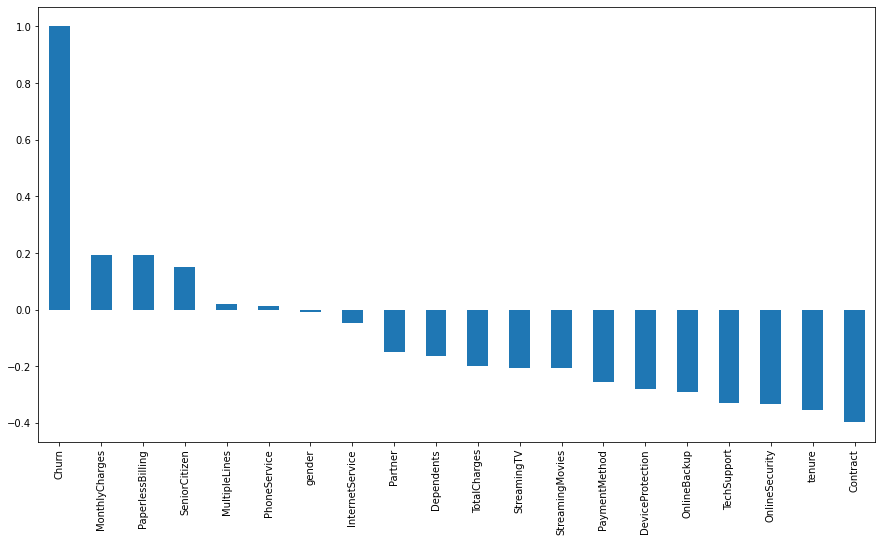

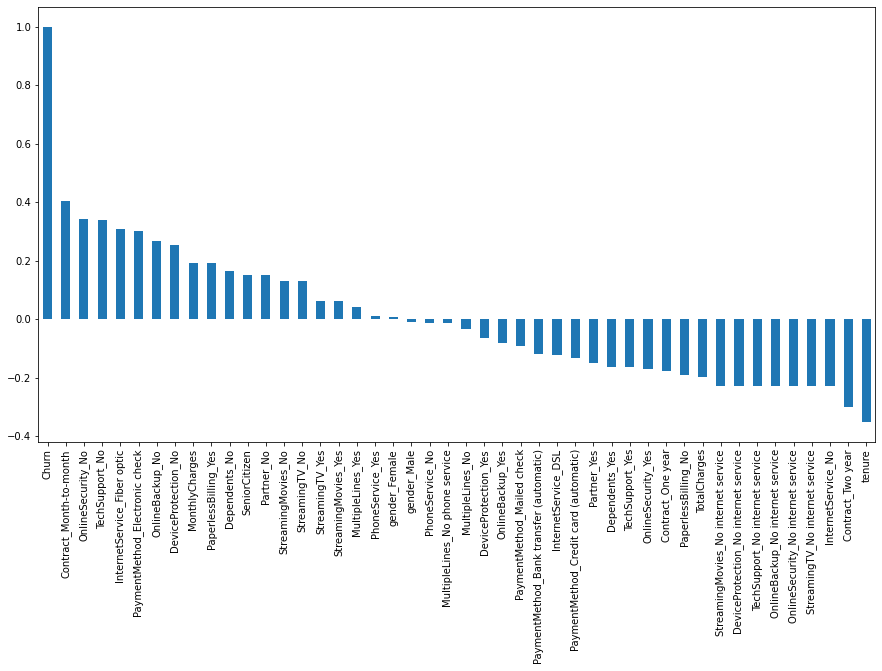

In [ ]:
#----- Visualizar la correlacion de las características con el target para ver cuales son las mas importantes
plt.figure(figsize=(15,8))
telcoData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Con la grafica de correlación se puede observar que la tenencia o numero de meses que el cliente ha permanecido en la empresa así como los contratos a dos años tienen una relación inversamente proporcional más alta con la decersión, mientras que los contratos de mes a mes, la ausencia de seguridad en línea y soporte técnico parecen tener una correlación positiva con el abandono.

# Escalización y PCA
A continuación se realizará la escalizacióny el análisis por componentes principales del conjunto de datos, para ver si es conveniente realizar una reduccion dimensional del conjunto de datos, así como para tener una mejor representación de los mismos.





In [ ]:
#-------Separar target de features
y = telcoData['Churn']   # objetivo a predecir
x = telcoData.drop(['Churn'], axis=1)   # matriz de Solo caracteristicas 

#-------Escalización y PCA
from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
pca = decomposition.PCA(n_components=11)
'''
 es redujo a dimensionalidad a 11 ya que luego de probar varias veces fue el nuemero que mejores resultados
 arrojo en las metricas de evaluación
 '''
pca.fit(x)
x = pca.transform(x)
print("varianza explicada por cada caracteristica después de PCA:",pca.explained_variance_ratio_)

varianza explicada por cada caracteristica después de PCA: [0.33017076 0.15745312 0.0965919  0.0694956  0.05643575 0.05266779
 0.04470888 0.04095328 0.02865285 0.02480214 0.01780677]


Segmentacion de los datos

In [ ]:
#---------------Segmentacion de los Datos---------------
from sklearn.model_selection import train_test_split
#Division en Train 75% y test 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10) 

In [ ]:
'''
#-----------3. Seleccion de los Parametros-------
#---------------Regresion Logistica--------------
'''
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(x_train,y_train)  # se ajustan los datos al modelo

#print(log_reg.get_params())

from sklearn.model_selection import GridSearchCV
# parametros define todos los hiperparametros a combinar
#parametros = {'penalty':['l1','l2'],  'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]}.
parametros = {'penalty':['l2'],  'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(log_reg,parametros,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)
print(y_pred)

print("Best CV params", cv.best_params_)   # mejores parametros encontrados por el grid search
prob = log_reg.predict_proba(x_train)      # Predicciones con el conjunto de entrenamiento (en probablidilidad)
prob_test = log_reg.predict_proba(x_test)  # predicciones con el conjunto de prueba (en probabilidad)
print("EL TIPO DE prob_test es",type(prob_test)) 
# prob test me da un np array de 223x2 pues me da la probabilidad p y 1-p yo necesito solo p
# asi que voy a recortar el np array para que me quede de 223x1
prob_test_dropped = prob_test[:,1]
# saco los tpr, fpr, y umbrales de la curva roc
fpr , tpr, tresholds = metrics.roc_curve(y_test, prob_test_dropped, pos_label=1)
# Saco los valores para graficar roc_ auc Receiver operating characteristic area under the curve
roc_auc = metrics.roc_auc_score(y_test, prob_test_dropped)

[0 0 0 ... 0 0 0]
Best CV params {'C': 0.01, 'penalty': 'l2'}
EL TIPO DE prob_test es <class 'numpy.ndarray'>


Para acelerar el proceso de busqueda de hiperparametros optimos para el modelo se utilizará cross-validated grid-search(búsqueda de cuadrícula con validación cruzada) la cual ajusta los hiperparametros para obtener los valores optimos. Este metodo probara todas las combinaciones de los valores pasados ​​en el diccionario y evalúa el modelo para cada combinación utilizando el método de validación cruzada. Por lo tanto, después de usar esta función, obtenemos precisión / pérdida para cada combinación de hiperparámetros y podemos elegir el que tenga el mejor rendimiento.

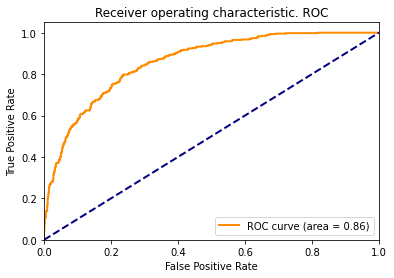

In [ ]:
#------------------ Grafico la ROC obtenida 
plt.figure()
lw = 2     # ancho de la linea
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #linea divisoria de la mitad
plt.xlim([0.0, 1.0])   # limites de la grafica
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

Matriz de Confusion
 [[1187  110]
 [ 209  252]]
El MCC es : 0.5023454105354792
El F1 Score es: 0.6123936816524909
La exactitud es: 0.8185437997724687


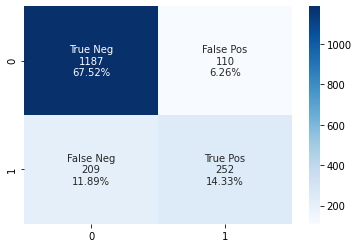

In [ ]:
#---------------Mariz de confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,cv.predict(x_test))
print('Matriz de Confusion\n',cf_matrix)
#---------------Matrix de confusion hecha en Seaborn
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#---------------MCC Mattius Correlation Coheficcient
from sklearn.metrics import matthews_corrcoef
print('El MCC es :',matthews_corrcoef(y_test, y_pred))
# el MCC Tuvo un valor de 0.5763 lo cual indica que el clasificador es bastante aceptable
# en cuanto a la evaluacion de todas las combinaciones de la matriz de confusión

#--------------F1 Score
from sklearn.metrics import f1_score
print('El F1 Score es:', f1_score(y_test, y_pred))

#-------------Accuracy 
from sklearn.metrics import accuracy_score
print('La exactitud es:', accuracy_score(y_test, y_pred))

Para el clasificador realizado con Logistic Regression se logró una exactitud  de 81.8% sobre el conjunto de Validacion o 'y' Se logró un TN de 67.52% y un TP de 14.33%. el MCC Tuvo un valor de 0.5023 lo cual indica que el clasificador es bastante aceptable en cuanto a la evaluacion de todas las combinaciones de la matriz de confusión. El F1 score fue de 0.612 lo cual es aceptable, y no fue tan bueno ya que se tuvieron varios falsos positivos y negativos, principalmente algo por mejorar serían los Verdaderos positivos ya que llegaron a un 14% en el conjunto de Prueba.